In this lesson, you will investigate how well ESPN does at predicting NFL fantasy football player performance. First, import these modules.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1.) We are interested in how well ESPN does at predicting how well a player will do in fantasy football. 

The ESPN website from 2017 listed how many fantasy points each player had ACTUALLY scored by the end of the season. The website used to be here:

http://games.espn.com/ffl/leaders

and every tab had the pattern http://games.espn.com/ffl/leaders?startIndex=0, http://games.espn.com/ffl/leaders?startIndex=50, ..., http://games.espn.com/ffl/leaders?startIndex=850 , where each page contained 50 more players' info. 

We have saved these webpages locally, and they are called "fftrankings0.htm", "fftrankings50.htm", ..., "fftrankings850.htm". 

Create a list called "urls" containing each of the these fftrankings file names.

In [6]:
urls = []
for i in range(0,900,50):
    urls.append('data/fftrankings'+str(i)+'.htm')
urls[0]

'data/fftrankings0.htm'

2.We can go to the first url and use pd.read_html to read in the info. "pd.read_html" is an awesome command when it works! It reads tables directly off of websites and saves them to a pandas dataframe. We'll save the dataframe with the name "df". Notice, those, that for some reason reading from the file creates a lot of duplicates. The page is a big buggy when it is saved locally, therefore, once you are done reading in the file, delete all of the duplicates. Google "pandas remove duplicates" to see how to do this in one line.

In [7]:
import pandas as pd
tables = pd.read_html(urls[0])
df = tables[0]
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.shape

(137, 21)

3.There are many columns. Let's only save the player name and points columns. Let's also drop the first three rows which are headers and not player names. "player" and "2017 points."

In [8]:
df = df[df.columns[[0,20]]]
df = df.rename(columns={0: 'player', 20: '2017 points'})
df.drop(df.index[0:3], inplace = True)
df.head()

,player,2017 points
3,"Todd Gurley II, LAR RB",383.3
4,"Russell Wilson, Sea QB",347.9
5,"Le'Veon Bell, Pit RB",341.6
6,"Alvin Kamara, NO RB",320.4
7,"Antonio Brown, Pit WR",310.3


4.Okay. Now we are going to loop through and add the dataframes you get from visiting the other urls to the bottom of the dataframe you got from the first url. You can do this by using the following command within the for loop:

table = pd.concat([table, new_table])

Be sure to drop the first three rows from the new table that you read in each time before you add them to the old table (since they don't contain player names). Also, remove the duplicates. Then, only save the player name and points columns and rename those columns "player" and "2017 points." Finally, concatenate the old table with the new each time. Your final dataframe should have 1008 rows.

In [9]:
for i in range(1,len(urls)):
    df2 = pd.read_html(urls[i])[0]
    df2.drop_duplicates(subset=None, keep='first', inplace=True)
    df2 = df2[df2.columns[[0,20]]]
    df2 = df2.rename(columns={0: 'player', 20: '2017 points'})
    df2.drop(df2.index[0:3], inplace = True)
    df = pd.concat([df, df2])

print(df.shape)
df.head()


(1008, 2)


,player,2017 points
3,"Todd Gurley II, LAR RB",383.3
4,"Russell Wilson, Sea QB",347.9
5,"Le'Veon Bell, Pit RB",341.6
6,"Alvin Kamara, NO RB",320.4
7,"Antonio Brown, Pit WR",310.3


5.Drop rows that are missing ANY entries. Then, reset the index. Your final dataframe should have 890 rows.

In [10]:
df = df.dropna(how = 'any')
df = df.reset_index(drop=True)
df.head()

,player,2017 points
0,"Todd Gurley II, LAR RB",383.3
1,"Russell Wilson, Sea QB",347.9
2,"Le'Veon Bell, Pit RB",341.6
3,"Alvin Kamara, NO RB",320.4
4,"Antonio Brown, Pit WR",310.3


In [29]:
playernames = []
for name in df['player']:
    index = name.split(',')
    player = index[0]
    team = index[1].split()[0].upper()
    playername = player + ', ' + team
    print(playername)

Todd Gurley II, LAR
Russell Wilson, SEA
Le'Veon Bell, PIT
Alvin Kamara, NO
Antonio Brown, PIT
DeAndre Hopkins, HOU
Cam Newton, CAR
Tom Brady, NE
Kareem Hunt, KC
Alex Smith, WSH
Melvin Gordon, LAC
Keenan Allen, LAC
Carson Wentz, PHI
Mark Ingram, NO
Kirk Cousins, MIN
Matthew Stafford, DET
Philip Rivers, LAC
LeSean McCoy, BUF
Drew Brees, NO
Larry Fitzgerald, ARI
Ben Roethlisberger, PIT
Dak Prescott, DAL
Jarvis Landry, CLE
Michael Thomas, NO
Jared Goff, LAR
Julio Jones, ATL
Blake Bortles, JAX
Tyreek Hill, KC
Adam Thielen, MIN
Case Keenum, DEN
Carlos Hyde, CLE
Travis Kelce, KC
Leonard Fournette, JAX
Christian McCaffrey, CAR
Matt Ryan, ATL
Rob Gronkowski, NE
A.J. Green, CIN
Marvin Jones Jr., DET
Golden Tate, DET
Doug Baldwin, SEA
Tyrod Taylor, CLE
Davante Adams, GB
Brandin Cooks, LAR
Duke Johnson Jr., CLE
Andy Dalton, CIN
Marcus Mariota, TEN
Derek Carr, OAK
Jacoby Brissett, IND
Demaryius Thomas, DEN
Josh McCown, NYJ
Ezekiel Elliott, DAL
Mike Evans, TB
Dion Lewis, TEN
Zach Ertz, PHI
Jameis Wi

6.Notice that the player names contain the name, team, and position. We will want to break this up. First, create a list called playernames that just contains the player names and teams (we need the team, too, because there are common names like David Johnson that play on two different teams). 

In [11]:
playernames = []
for player in df['player']:
    print(player)
    line = player.split(',')
    name = line[0]
    team = line[1].split()[0].upper()
    playername = name + ', ' + team
    playernames.append(playername)

Todd Gurley II, LAR RB
Russell Wilson, Sea QB
Le'Veon Bell, Pit RB
Alvin Kamara, NO RB
Antonio Brown, Pit WR
DeAndre Hopkins, Hou WR Q
Cam Newton, Car QB Q
Tom Brady, NE QB
Kareem Hunt, KC RB Q
Alex Smith, Wsh QB
Melvin Gordon, LAC RB
Keenan Allen, LAC WR
Carson Wentz, Phi QB Q
Mark Ingram, NO RB SSPD
Kirk Cousins, Min QB
Matthew Stafford, Det QB
Philip Rivers, LAC QB
LeSean McCoy, Buf RB Q
Drew Brees, NO QB
Larry Fitzgerald, Ari WR
Ben Roethlisberger, Pit QB
Dak Prescott, Dal QB
Jarvis Landry, Cle WR
Michael Thomas, NO WR
Jared Goff, LAR QB
Julio Jones, Atl WR
Blake Bortles, Jax QB
Tyreek Hill, KC WR
Adam Thielen, Min WR
Case Keenum, Den QB
Carlos Hyde, Cle RB
Travis Kelce, KC TE
Leonard Fournette, Jax RB
Christian McCaffrey, Car RB
Matt Ryan, Atl QB
Rob Gronkowski, NE TE
A.J. Green, Cin WR
Marvin Jones Jr., Det WR
Golden Tate, Det WR
Doug Baldwin, Sea WR
Tyrod Taylor, Cle QB
Davante Adams, GB WR Q
Brandin Cooks, LAR WR Q
Duke Johnson Jr., Cle RB
Andy Dalton, Cin QB
Marcus Mariota, Te

7.We'll create a list called positions that contains just the player positions. We'll do this by splitting the phrase by spaces and saving the very last item in each phrase. In a few cases, if the name ends in something other than position (like 'Q' for questionable of 'SSPD' for suspended), we'll take the second to last item:

In [12]:
positions = []
for player in df['player'].values:
    position = player.split()[-1]
    if position not in ['QB', 'RB', 'WR', 'TE']:
        position = player.split()[-2]
    positions.append(position)

8.Create a new data frame called "df1" where the player name called "player" is in the first column, the player position is in the second column, and the 2017 points is in the third column.

In [13]:
df1 = pd.DataFrame(data = {'player': playernames, 
                             'positions': positions, 
                            '2017 points': df['2017 points']})
print(df1.shape)
df1.head()


(890, 3)


,player,positions,2017 points
0,"Todd Gurley II, LAR",RB,383.3
1,"Russell Wilson, SEA",QB,347.9
2,"Le'Veon Bell, PIT",RB,341.6
3,"Alvin Kamara, NO",RB,320.4
4,"Antonio Brown, PIT",WR,310.3


9.Now go to this website to see what ESPN projected the player rankings to be BEFORE the season had started:

http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200

We have also stored this locally as "fftprojections.htm". Use pd.read_html to read this data in.

10.Save just the Player/Position/Team column to a dataframe called "df2". Rename the column "player".

In [16]:
table2 = pd.read_html('data/fftprojections.htm')
#table2 = pd.read_html('http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200')
df2=table2[1]

In [17]:
df2 = df2[['Player/Position/Team']]
df2 = df2.rename(index=str, columns={'Player/Position/Team': 'player'})
df2.head()

,player
0,"1. David Johnson, RB, ARI"
1,"2. Le'Veon Bell, RB, PIT"
2,"3. Antonio Brown, WR, PIT"
3,"4. Ezekiel Elliott, RB, DAL"
4,"5. Odell Beckham Jr., WR, NYG"


11.We want to merge these two data frames. In order to do this, we need the player names to match up exactly. Update the "df2" data frame above to include only the player names and teams.

In [18]:
df2['player'] = [' '.join(player.split()[1:-2])+' '+player.split()[-1] for player in df2['player'] ]
df2.head()

,player
0,"David Johnson, ARI"
1,"Le'Veon Bell, PIT"
2,"Antonio Brown, PIT"
3,"Ezekiel Elliott, DAL"
4,"Odell Beckham Jr., NYG"


12.We'll want to create another column for what ESPN projected their ranking to be. Luckily, since they are in order, an index of 0 correponds to a ranking of 1, an index of 1 corresponds to a ranking of 2, etc. We can use the index and a list comprehension to create a ranking column:

In [19]:
df2['ranking'] = [int(x)+1 for x in df2.index]
df2.head()

,player,ranking
0,"David Johnson, ARI",1
1,"Le'Veon Bell, PIT",2
2,"Antonio Brown, PIT",3
3,"Ezekiel Elliott, DAL",4
4,"Odell Beckham Jr., NYG",5


13.Okay, we are ready to merge these two dataframes. We'll use "inner" to denote that we only want to consider players that are in BOTH dataframes and we'll use "on=player" to denote that we want to merge the dataframes based on the player column.

In [20]:
results = pd.merge(df1, df2, how='inner', on = ['player'])
results.head()

,player,positions,2017 points,ranking
0,"Russell Wilson, SEA",QB,347.9,79
1,"Le'Veon Bell, PIT",RB,341.6,2
2,"Alvin Kamara, NO",RB,320.4,152
3,"Antonio Brown, PIT",WR,310.3,3
4,"DeAndre Hopkins, HOU",WR,309.8,28


14.Drop any rows that have any missing values. There might not be, but perform this operation just in case.

In [52]:
results = results.dropna(how = 'any')

15.View all of the column data types using one command.

In [53]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 4 columns):
player         121 non-null object
positions      121 non-null object
2017 points    121 non-null object
ranking        121 non-null int64
dtypes: int64(1), object(3)
memory usage: 4.7+ KB


16.Change the data type of 2017 points to a float.

In [54]:
results['2017 points'] = results['2017 points'].astype(float)

17.Plot ESPN ranking on the x-axis versus 2017 points scored on the y-axis. Label your axes.

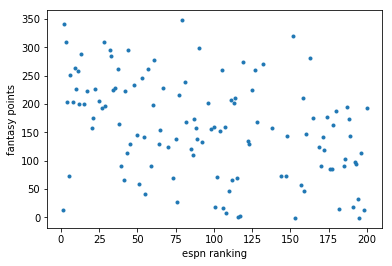

In [55]:
plt.plot(results['ranking'], results['2017 points'], '.')
plt.xlabel('espn ranking')
plt.ylabel('fantasy points')

18.Is there a downward trend? Why does this make sense?

In [20]:
#because a ranking of 1 corresponds to the most projected points

19.We can create a line of best fit:

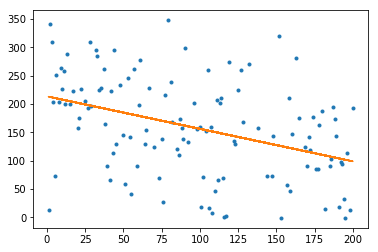

In [56]:
import numpy as np

x = results['ranking']
y = results['2017 points']
fit = np.polyfit(x, y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y,'.', x, fit_fn(x))

20.Print the slope and intercept of the line. 

In [57]:
m, b = np.polyfit(x,y,1)
print(m,b)

-0.5734477697425076 213.67259031171207


21.Create another column in the results dataframe called "predicted points" that lists the predicted points from the line of best fit for each player. Note: you can do this in one line. Don't use a loop.

In [58]:
results['predicted points'] = fit_fn(results['ranking'])

22.Create another column called "residual" that lists the difference between the actual 2017 points and the predicted ESPN points.

In [59]:
results['residual'] = results['2017 points'] - results['predicted points']

23.Sort the dataframe by residual from lowest to highest to see the most overrated players.

In [60]:
results.sort_values(by = 'residual', ascending = True).head()

,player,positions,2017 points,ranking,predicted points,residual
114,"David Johnson, ARI",RB,13.0,1,213.099143,-200.099143
118,"Andrew Luck, IND",QB,0.0,116,147.152649,-147.152649
117,"Kevin White, CHI",WR,2.6,117,146.579201,-143.979201
116,"Tyler Eifert, CIN",TE,8.6,108,151.740231,-143.140231
109,"Terrance West, BAL",RB,28.1,76,170.090560,-141.990560


24.R-squared is a measure of how well your model fits your data. Use the function below to calculate R-squared.

In [61]:
def rsquared(x, y, y_predicted):                   
    ybar = np.sum(y)/len(y)          
    ssreg = np.sum((y_predicted-ybar)**2)  
    sstot = np.sum((y - ybar)**2)  
    return ssreg / sstot

rsquared(results['ranking'], 
         results['2017 points'], 
         results['predicted points'])

0.15948049574772416

25.That R-Squared was pretty low. Let's try to do better.

Up until now, you've only been able to create predictive models with numerical variables (e.g. rankings, points, etc.) However, we can also create regression models using categorical variables (such as football position!) Very exciting. 

In addition, up until now, you have probably only calculated a linear regression line when you have a single input variable. Today, we'll use multiple linear regression (where the input will be a matrix instead of a single vector).

Our goal will be to use ESPN rankings (numerical) AND player position (categorical) to predict their fantasy points.

Step 1: Create a new dataframe from the results dataframe called onehot that includes just the positions and ranking columns. (I'll explain why it's called onehot in a minute).

In [62]:
onehot = results[['ranking','positions']]
onehot.head()

,ranking,positions
0,79,QB
1,2,RB
2,152,RB
3,3,WR
4,28,WR


26.Now, a major step towards performing regression when there are categorical variables involved is first creating a matrix (called a one-hot matrix) where each position corresponds to a different column in the matrix. For example, if a player is a QB, he'll have a 1 in the QB column and a 0 in all of the others. 

We can do this using a built-in pandas function called get_dummies.

Run the following code.

In [63]:
positions = pd.get_dummies(results['positions'])
onehot = onehot.drop('positions', axis = 1)
onehot = onehot.join(positions)
onehot.head()

,ranking,QB,RB,TE,WR
0,79,1,0,0,0
1,2,0,1,0,0
2,152,0,1,0,0
3,3,0,0,0,1
4,28,0,0,0,1


27.Okay. Our input is going to be this matrix and our output is going to be the 2017 points. We'll need to have the scikit-learn package in order to use the the multiple linear regression model. scikit-learn is the most popular package for maching learning algorithms using Python. So exciting!!! 

Try running the cell below. If it doesn't work, try downloading the scikit-learn package by typing into your terminal this:

pip install -U scikit-learn

or this:

conda install -c anaconda scikit-learn

In [64]:
from sklearn.linear_model import LinearRegression

X = onehot
y = results['2017 points']

clf = LinearRegression()
clf.fit(X, y)
clf.predict(X)
print('R-squared', clf.score(X,y))

R-squared 0.31478042460841704


/Users/shareshianl/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


28.Wow! Our R-squared doubled when we incorporated the player position into our input. Let's visualize what is going on with this multiple linear regression by creating the following plot below:

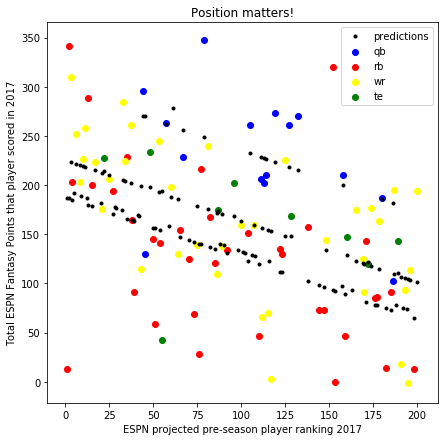

In [80]:
#Let's break things down by position:
quarterbacks = results[results['positions'] == 'QB']
runningbacks = results[results['positions'] == 'RB']
receivers = results[results['positions'] == 'WR']
tightends = results[results['positions'] == 'TE']

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(quarterbacks.ranking, quarterbacks['2017 points'],  color='blue', label='qb')
ax.scatter(runningbacks.ranking, runningbacks['2017 points'],  color='red', label='rb')
ax.scatter(receivers.ranking, receivers['2017 points'],  color='yellow', label = 'wr')
ax.scatter(tightends.ranking, tightends['2017 points'],  color='green', label = 'te')

ax.plot(X.ranking, clf.predict(X), 'k.', label = 'predictions')
ax.set_xlabel('ESPN projected pre-season player ranking 2017')
ax.set_ylabel('Total ESPN Fantasy Points that player scored in 2017')
ax.set_title('Position matters!')
ax.legend(loc='best')

29.Explain in your own words why your multiple linear regression model is plotting the black dots in the manner that you see above.

In [ ]:
#different linear lines for different positions

In [4]:
try:
    print(5/0)
except ZeroDivisionError as error:
    print(error)
    print('The linux_interaction() function was not executed')

division by zero
The linux_interaction() function was not executed


Note: You've just explored the very beginnings of using Python to perform machine learning! Machine learning is a pretty ill defined term, but according to Wikipedia, "Machine learning explores the construction and study of algorithms that can learn from and make predictions on data." 

You have just learned the multiple linear regression sci-kit learn method. There are many MUCH better methods (RidgeCV, GradientBoostingRegressor, etc.)

There are also better measures for how well a model does. (The adjusted R-squared measure is MUCH better than the R-squared measure.)

In addition, we just committed the cardinal sin of data science in the above example, which is to use our entire dataset to train our model. In practice, we should have used just a subset of the player data to train our model (i.e., to calculate the line of best fit) and then we should have calculated how well our model did at predicting the test set values (the players that we didn't include in our training model).

To learn more, this is a great first tutorial on how to use sci-kit learn for machine learning:

https://www.datacamp.com/community/tutorials/machine-learning-python

More docs are here:

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

And Andrew Ng's online Machine Learning course is famous:

https://www.coursera.org/learn/machine-learning


